## Dataset preparation

Download and extract the dataset from Kaggle. Prepare kaggle.json in the current working directory.

In [1]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d noobyogi0100/shoe-dataset
!unzip -q shoe-dataset.zip
!mv shoeTypeClassifierDataset ShoeDataset

Dataset URL: https://www.kaggle.com/datasets/noobyogi0100/shoe-dataset
License(s): CC0-1.0
 99% 322M/324M [00:10<00:00, 29.8MB/s]
100% 324M/324M [00:10<00:00, 32.6MB/s]


## Import Library

In [2]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import pickle

## Use Pre-Trained Models to Extract Features

Using EfficientNetB3 with pre-trained weights from imagenet. Set the output layer at the feature level ('top_dropout'), in the hope that the model can extract features from the image optimally.

In [3]:
# Load pre-trained EfficientNetB3 model
base_model = EfficientNetB3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('top_dropout').output)

base_model.summary()

50095040/50095040 [==============================] - 2s 0us/step
Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 300, 300, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 300, 300, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescal

Function is to infer an image from a previously created model. Returns features in the form of a 1-dimensional (flatten) list.

In [4]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(300, 300))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

## Extract Feature from All Images in Dataset

In [5]:
dataset_dir = 'shoe-dataset'

# Function to get all image paths
def get_image_paths(directory):
    image_paths = []
    # os.walk to traverse directory, get image paths from all splits and classes
    for root, _, files in os.walk(directory):
        for file in files:
            image_paths.append(os.path.join(root, file))
    return image_paths

# Get image paths
image_paths = get_image_paths('ShoeDataset')

# Extract features and store them
features = []
for img_path in tqdm(image_paths):
    features.append((img_path, extract_features(img_path, model)))

# Save features as pickle file
with open('shoe_features.pkl', 'wb') as f:
    pickle.dump(features, f)


  0%|          | 0/1794 [00:00<?, ?it/s]

1/1 [==============================] - 9s 9s/step


  0%|          | 1/1794 [00:10<5:06:32, 10.26s/it]

1/1 [==============================] - 0s 29ms/step


  0%|          | 3/1794 [00:10<1:21:18,  2.72s/it]

1/1 [==============================] - 0s 29ms/step


  0%|          | 5/1794 [00:10<40:52,  1.37s/it]  

1/1 [==============================] - 0s 28ms/step


  0%|          | 7/1794 [00:10<24:43,  1.20it/s]

1/1 [==============================] - 0s 55ms/step


  1%|          | 9/1794 [00:11<16:59,  1.75it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 10/1794 [00:11<14:11,  2.10it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 11/1794 [00:11<12:03,  2.47it/s]

1/1 [==============================] - 0s 51ms/step


  1%|          | 12/1794 [00:11<10:22,  2.86it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 13/1794 [00:11<09:06,  3.26it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 14/1794 [00:11<07:51,  3.78it/s]

1/1 [==============================] - 0s 56ms/step


  1%|          | 15/1794 [00:12<07:12,  4.11it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 16/1794 [00:12<06:54,  4.29it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 17/1794 [00:12<06:18,  4.70it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 18/1794 [00:12<05:59,  4.95it/s]

1/1 [==============================] - 0s 47ms/step


  1%|          | 19/1794 [00:12<05:25,  5.45it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 20/1794 [00:12<05:26,  5.44it/s]

1/1 [==============================] - 0s 53ms/step


  1%|          | 21/1794 [00:13<05:04,  5.83it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 22/1794 [00:13<04:51,  6.07it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 24/1794 [00:13<03:45,  7.85it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 25/1794 [00:13<03:50,  7.68it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 26/1794 [00:13<03:40,  8.02it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 28/1794 [00:13<03:13,  9.15it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 30/1794 [00:14<02:56,  9.97it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 31/1794 [00:14<02:57,  9.96it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 32/1794 [00:14<02:58,  9.86it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 34/1794 [00:14<02:53, 10.17it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 36/1794 [00:14<02:44, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 38/1794 [00:14<02:41, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 40/1794 [00:14<02:51, 10.20it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 42/1794 [00:15<02:59,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 44/1794 [00:15<02:49, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 46/1794 [00:15<02:50, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 48/1794 [00:15<02:44, 10.59it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 50/1794 [00:15<02:45, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 52/1794 [00:16<02:40, 10.88it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 54/1794 [00:16<02:39, 10.90it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 56/1794 [00:16<03:01,  9.59it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 58/1794 [00:16<03:11,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 59/1794 [00:16<03:12,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 61/1794 [00:17<03:09,  9.14it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 63/1794 [00:17<03:13,  8.96it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 65/1794 [00:17<02:57,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 67/1794 [00:17<02:49, 10.21it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 69/1794 [00:17<02:42, 10.60it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 71/1794 [00:18<02:40, 10.72it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 73/1794 [00:18<02:49, 10.14it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 75/1794 [00:18<02:48, 10.21it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 77/1794 [00:18<02:55,  9.76it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 79/1794 [00:18<02:48, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 81/1794 [00:19<02:46, 10.31it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 83/1794 [00:19<03:09,  9.03it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 85/1794 [00:19<03:11,  8.93it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 87/1794 [00:19<03:10,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▍         | 89/1794 [00:20<03:05,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 90/1794 [00:20<03:13,  8.83it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 92/1794 [00:20<03:11,  8.90it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 94/1794 [00:20<03:06,  9.11it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 96/1794 [00:20<02:53,  9.80it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 97/1794 [00:20<02:54,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 98/1794 [00:20<03:02,  9.28it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 99/1794 [00:21<03:00,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 100/1794 [00:21<03:02,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 102/1794 [00:21<02:45, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 104/1794 [00:21<02:54,  9.70it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 106/1794 [00:21<02:56,  9.54it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 108/1794 [00:21<02:45, 10.19it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 110/1794 [00:22<02:42, 10.35it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 112/1794 [00:22<03:02,  9.22it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▋         | 113/1794 [00:22<03:00,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 115/1794 [00:22<02:49,  9.91it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 117/1794 [00:22<02:40, 10.47it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 119/1794 [00:23<02:40, 10.43it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 121/1794 [00:23<03:16,  8.49it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 122/1794 [00:23<03:36,  7.71it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 123/1794 [00:23<03:32,  7.87it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 124/1794 [00:23<03:48,  7.31it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 125/1794 [00:24<03:59,  6.96it/s]

1/1 [==============================] - 0s 67ms/step


  7%|▋         | 126/1794 [00:24<04:06,  6.76it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 127/1794 [00:24<04:28,  6.22it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 128/1794 [00:24<04:27,  6.23it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 129/1794 [00:24<04:37,  6.01it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 130/1794 [00:24<04:41,  5.92it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 131/1794 [00:25<04:15,  6.52it/s]

1/1 [==============================] - 0s 58ms/step


  7%|▋         | 132/1794 [00:25<04:14,  6.52it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 133/1794 [00:25<04:29,  6.17it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 134/1794 [00:25<04:10,  6.62it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 135/1794 [00:25<04:16,  6.46it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 137/1794 [00:25<03:25,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


  8%|▊         | 139/1794 [00:26<03:03,  9.00it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 141/1794 [00:26<02:55,  9.40it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 142/1794 [00:26<03:12,  8.60it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 143/1794 [00:26<03:19,  8.28it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 145/1794 [00:26<03:01,  9.08it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 147/1794 [00:26<02:47,  9.82it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 149/1794 [00:27<02:43, 10.06it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 150/1794 [00:27<02:44,  9.99it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 151/1794 [00:27<02:48,  9.75it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 153/1794 [00:27<02:42, 10.07it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 155/1794 [00:27<02:37, 10.39it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 157/1794 [00:27<02:42, 10.07it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 159/1794 [00:28<02:38, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 161/1794 [00:28<02:51,  9.51it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 163/1794 [00:28<02:45,  9.86it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 165/1794 [00:28<02:41, 10.11it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 167/1794 [00:28<02:45,  9.84it/s]

1/1 [==============================] - 0s 35ms/step


  9%|▉         | 168/1794 [00:28<02:52,  9.40it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 170/1794 [00:29<03:01,  8.95it/s]

1/1 [==============================] - 0s 29ms/step


 10%|▉         | 171/1794 [00:29<02:58,  9.09it/s]

1/1 [==============================] - 0s 30ms/step


 10%|▉         | 173/1794 [00:29<02:49,  9.54it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 175/1794 [00:29<02:42,  9.94it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 177/1794 [00:29<02:35, 10.37it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 179/1794 [00:30<02:43,  9.89it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 180/1794 [00:30<02:43,  9.88it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 181/1794 [00:30<02:43,  9.84it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 183/1794 [00:30<02:34, 10.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 185/1794 [00:30<02:44,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 187/1794 [00:30<02:37, 10.18it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 189/1794 [00:31<02:31, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 191/1794 [00:31<02:39, 10.05it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 193/1794 [00:31<02:37, 10.15it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 195/1794 [00:31<02:33, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 197/1794 [00:31<02:29, 10.65it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 199/1794 [00:32<02:29, 10.69it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 201/1794 [00:32<02:40,  9.93it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█▏        | 203/1794 [00:32<02:37, 10.11it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█▏        | 205/1794 [00:32<02:30, 10.54it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 207/1794 [00:32<02:26, 10.83it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 209/1794 [00:32<02:27, 10.74it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 211/1794 [00:33<02:31, 10.42it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 213/1794 [00:33<02:41,  9.79it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 215/1794 [00:33<02:34, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 217/1794 [00:33<02:29, 10.51it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 219/1794 [00:33<02:26, 10.78it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 221/1794 [00:34<02:27, 10.65it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 223/1794 [00:34<02:29, 10.49it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 225/1794 [00:34<02:28, 10.57it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 227/1794 [00:34<02:21, 11.07it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 229/1794 [00:34<02:21, 11.04it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 231/1794 [00:35<02:21, 11.01it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 233/1794 [00:35<02:30, 10.39it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 235/1794 [00:35<02:26, 10.65it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 237/1794 [00:35<02:59,  8.68it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 238/1794 [00:35<03:14,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


 13%|█▎        | 239/1794 [00:36<03:32,  7.31it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 240/1794 [00:36<03:44,  6.92it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 241/1794 [00:36<04:10,  6.21it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 242/1794 [00:36<04:20,  5.96it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▎        | 243/1794 [00:36<04:13,  6.13it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▎        | 244/1794 [00:37<04:19,  5.97it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▎        | 245/1794 [00:37<04:16,  6.04it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▎        | 246/1794 [00:37<04:18,  5.98it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 247/1794 [00:37<04:15,  6.06it/s]

1/1 [==============================] - 0s 76ms/step


 14%|█▍        | 248/1794 [00:37<04:21,  5.92it/s]

1/1 [==============================] - 0s 52ms/step


 14%|█▍        | 249/1794 [00:37<04:23,  5.87it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 250/1794 [00:38<04:23,  5.87it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 251/1794 [00:38<04:07,  6.25it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▍        | 253/1794 [00:38<03:13,  7.96it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 255/1794 [00:38<03:00,  8.53it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 257/1794 [00:38<02:44,  9.32it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 259/1794 [00:38<02:31, 10.14it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 261/1794 [00:39<02:22, 10.78it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 263/1794 [00:39<02:24, 10.58it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 265/1794 [00:39<02:19, 10.94it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▍        | 267/1794 [00:39<02:22, 10.72it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 269/1794 [00:39<02:20, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 271/1794 [00:39<02:17, 11.04it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▌        | 273/1794 [00:40<02:38,  9.59it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 275/1794 [00:40<02:30, 10.07it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 277/1794 [00:40<02:27, 10.30it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 279/1794 [00:40<02:23, 10.59it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 281/1794 [00:40<02:19, 10.84it/s]

1/1 [==============================] - 0s 35ms/step


 16%|█▌        | 283/1794 [00:41<02:19, 10.81it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 285/1794 [00:41<02:18, 10.92it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 287/1794 [00:41<02:21, 10.67it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 289/1794 [00:41<02:17, 10.93it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 291/1794 [00:41<02:14, 11.19it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 293/1794 [00:42<02:13, 11.21it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 295/1794 [00:42<02:22, 10.49it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 297/1794 [00:42<02:19, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 299/1794 [00:42<02:17, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 301/1794 [00:42<02:20, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 303/1794 [00:43<02:26, 10.18it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 305/1794 [00:43<02:43,  9.11it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 307/1794 [00:43<02:31,  9.84it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 309/1794 [00:43<02:22, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 311/1794 [00:43<02:22, 10.42it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 313/1794 [00:43<02:17, 10.77it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 315/1794 [00:44<02:16, 10.86it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 317/1794 [00:44<02:18, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 319/1794 [00:44<02:16, 10.84it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 321/1794 [00:44<02:14, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 323/1794 [00:44<02:20, 10.47it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 325/1794 [00:45<02:19, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 327/1794 [00:45<02:19, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 329/1794 [00:45<02:15, 10.82it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 331/1794 [00:45<02:10, 11.22it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 333/1794 [00:45<02:17, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▊        | 335/1794 [00:46<02:12, 11.03it/s]

1/1 [==============================] - 0s 36ms/step


 19%|█▉        | 337/1794 [00:46<02:27,  9.90it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 339/1794 [00:46<02:36,  9.30it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 341/1794 [00:46<02:30,  9.64it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 343/1794 [00:46<02:25,  9.97it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 345/1794 [00:47<02:19, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 347/1794 [00:47<02:21, 10.20it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 349/1794 [00:47<02:14, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 351/1794 [00:47<02:23, 10.04it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 353/1794 [00:47<02:19, 10.31it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 355/1794 [00:48<03:06,  7.72it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 356/1794 [00:48<03:08,  7.62it/s]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 357/1794 [00:48<03:19,  7.21it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 358/1794 [00:48<03:24,  7.02it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 359/1794 [00:48<03:31,  6.78it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 360/1794 [00:49<03:27,  6.91it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 361/1794 [00:49<03:20,  7.13it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 362/1794 [00:49<03:35,  6.65it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 363/1794 [00:49<03:45,  6.36it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 364/1794 [00:49<03:56,  6.05it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 365/1794 [00:49<04:29,  5.31it/s]

1/1 [==============================] - 0s 70ms/step


 20%|██        | 366/1794 [00:50<04:35,  5.18it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 367/1794 [00:50<04:14,  5.62it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██        | 368/1794 [00:50<03:55,  6.05it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 370/1794 [00:50<03:07,  7.60it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 372/1794 [00:50<02:48,  8.42it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 374/1794 [00:50<02:34,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 376/1794 [00:51<02:25,  9.76it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 378/1794 [00:51<02:18, 10.19it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 380/1794 [00:51<02:13, 10.59it/s]

1/1 [==============================] - 0s 32ms/step


 21%|██▏       | 382/1794 [00:51<02:09, 10.87it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 384/1794 [00:51<02:12, 10.63it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 386/1794 [00:52<02:07, 11.04it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 388/1794 [00:52<02:11, 10.65it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 390/1794 [00:52<02:07, 11.05it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 392/1794 [00:52<02:05, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 394/1794 [00:52<02:02, 11.41it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 396/1794 [00:52<02:04, 11.19it/s]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 398/1794 [00:53<02:09, 10.75it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 400/1794 [00:53<02:11, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 402/1794 [00:53<02:09, 10.71it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 404/1794 [00:53<02:07, 10.93it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 406/1794 [00:53<02:10, 10.61it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 408/1794 [00:54<02:09, 10.68it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 410/1794 [00:54<02:11, 10.54it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 412/1794 [00:54<02:11, 10.55it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 414/1794 [00:54<02:16, 10.15it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 416/1794 [00:54<02:14, 10.23it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 418/1794 [00:55<02:12, 10.38it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 420/1794 [00:55<02:21,  9.71it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▎       | 422/1794 [00:55<02:19,  9.83it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▎       | 424/1794 [00:55<02:13, 10.25it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 426/1794 [00:55<02:09, 10.56it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 428/1794 [00:56<02:09, 10.55it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 430/1794 [00:56<02:10, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 432/1794 [00:56<02:15, 10.03it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 434/1794 [00:56<02:10, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 436/1794 [00:56<02:07, 10.66it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 438/1794 [00:56<02:08, 10.51it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▍       | 440/1794 [00:57<02:13, 10.13it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 442/1794 [00:57<02:08, 10.55it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 444/1794 [00:57<02:12, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 446/1794 [00:57<02:08, 10.47it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 448/1794 [00:58<02:16,  9.88it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 450/1794 [00:58<02:17,  9.81it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 452/1794 [00:58<02:09, 10.34it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 454/1794 [00:58<02:04, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 456/1794 [00:58<02:01, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 458/1794 [00:58<01:59, 11.16it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 460/1794 [00:59<02:07, 10.45it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 462/1794 [00:59<02:05, 10.65it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 464/1794 [00:59<02:05, 10.64it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 466/1794 [00:59<02:01, 10.95it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 468/1794 [00:59<02:02, 10.82it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 470/1794 [01:00<02:00, 11.01it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▋       | 472/1794 [01:00<02:08, 10.25it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 474/1794 [01:00<02:11, 10.06it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 476/1794 [01:00<02:33,  8.58it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 477/1794 [01:00<02:45,  7.96it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 478/1794 [01:01<02:54,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 479/1794 [01:01<02:58,  7.36it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 480/1794 [01:01<03:07,  7.00it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 481/1794 [01:01<03:13,  6.77it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 482/1794 [01:01<03:24,  6.42it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 483/1794 [01:01<03:13,  6.79it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 484/1794 [01:01<03:07,  7.00it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 485/1794 [01:02<03:06,  7.00it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 486/1794 [01:02<03:10,  6.85it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 487/1794 [01:02<03:15,  6.70it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 488/1794 [01:02<03:09,  6.89it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 489/1794 [01:02<03:02,  7.15it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 490/1794 [01:02<03:13,  6.74it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 491/1794 [01:03<03:30,  6.20it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 492/1794 [01:03<03:30,  6.18it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 493/1794 [01:03<03:37,  5.99it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 494/1794 [01:03<03:14,  6.70it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 496/1794 [01:03<02:39,  8.16it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 498/1794 [01:03<02:19,  9.32it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 500/1794 [01:04<02:15,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 501/1794 [01:04<02:33,  8.40it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 502/1794 [01:04<02:29,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 504/1794 [01:04<02:16,  9.47it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 506/1794 [01:04<02:09,  9.97it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 508/1794 [01:04<02:02, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 510/1794 [01:05<02:04, 10.35it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▊       | 512/1794 [01:05<02:06, 10.17it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▊       | 514/1794 [01:05<02:17,  9.29it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 516/1794 [01:05<02:14,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 517/1794 [01:05<02:42,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 518/1794 [01:06<02:36,  8.15it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 519/1794 [01:06<02:35,  8.19it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 520/1794 [01:06<02:30,  8.47it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 522/1794 [01:06<02:20,  9.04it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 524/1794 [01:06<02:15,  9.35it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 526/1794 [01:06<02:06, 10.05it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 528/1794 [01:07<02:04, 10.14it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 530/1794 [01:07<02:06, 10.01it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██▉       | 532/1794 [01:07<02:05, 10.03it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 534/1794 [01:07<02:02, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 536/1794 [01:07<02:00, 10.42it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 538/1794 [01:08<01:58, 10.63it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 540/1794 [01:08<02:03, 10.14it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 542/1794 [01:08<02:02, 10.23it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 544/1794 [01:08<01:59, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 546/1794 [01:08<01:58, 10.50it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 548/1794 [01:08<01:58, 10.48it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 550/1794 [01:09<02:06,  9.80it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 552/1794 [01:09<02:02, 10.15it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 554/1794 [01:09<02:03, 10.03it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 556/1794 [01:09<02:07,  9.72it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 558/1794 [01:10<02:05,  9.89it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 559/1794 [01:10<02:06,  9.75it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 560/1794 [01:10<02:06,  9.73it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 562/1794 [01:10<02:07,  9.64it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 563/1794 [01:10<02:08,  9.55it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 564/1794 [01:10<02:10,  9.44it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 565/1794 [01:10<02:16,  9.02it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 567/1794 [01:11<02:17,  8.91it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 568/1794 [01:11<02:27,  8.33it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 570/1794 [01:11<02:13,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 572/1794 [01:11<02:15,  9.03it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 573/1794 [01:11<02:15,  9.00it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 575/1794 [01:11<02:04,  9.81it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 577/1794 [01:12<01:59, 10.17it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 579/1794 [01:12<02:00, 10.07it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 581/1794 [01:12<01:56, 10.44it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 583/1794 [01:12<01:55, 10.51it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 585/1794 [01:12<01:53, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 587/1794 [01:12<01:51, 10.87it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 589/1794 [01:13<02:04,  9.64it/s]

1/1 [==============================] - 0s 60ms/step


 33%|███▎      | 590/1794 [01:13<02:26,  8.21it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 591/1794 [01:13<02:30,  8.00it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 592/1794 [01:13<02:40,  7.50it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 593/1794 [01:13<02:45,  7.25it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 594/1794 [01:14<02:59,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 595/1794 [01:14<03:16,  6.11it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 596/1794 [01:14<03:07,  6.37it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 597/1794 [01:14<03:20,  5.98it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 598/1794 [01:14<03:08,  6.34it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 599/1794 [01:14<03:15,  6.11it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 600/1794 [01:15<03:07,  6.35it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▎      | 601/1794 [01:15<03:10,  6.27it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 602/1794 [01:15<03:04,  6.45it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▎      | 603/1794 [01:15<03:01,  6.57it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 604/1794 [01:15<02:59,  6.62it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 605/1794 [01:15<03:11,  6.22it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 607/1794 [01:16<02:35,  7.64it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 608/1794 [01:16<02:33,  7.75it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 609/1794 [01:16<02:27,  8.05it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 611/1794 [01:16<02:18,  8.51it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 612/1794 [01:16<02:14,  8.82it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 614/1794 [01:16<02:16,  8.67it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 616/1794 [01:17<02:16,  8.64it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 617/1794 [01:17<02:26,  8.03it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 619/1794 [01:17<02:17,  8.55it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 620/1794 [01:17<02:15,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 621/1794 [01:17<02:16,  8.57it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 622/1794 [01:17<02:20,  8.34it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 624/1794 [01:18<02:20,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▍      | 625/1794 [01:18<02:23,  8.13it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 626/1794 [01:18<02:17,  8.52it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 628/1794 [01:18<02:09,  9.01it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 630/1794 [01:18<02:01,  9.55it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 631/1794 [01:18<02:04,  9.37it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 633/1794 [01:18<01:59,  9.73it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 635/1794 [01:19<02:04,  9.33it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 637/1794 [01:19<01:58,  9.78it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 639/1794 [01:19<01:55,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


 36%|███▌      | 641/1794 [01:19<02:07,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 643/1794 [01:20<02:02,  9.39it/s]

1/1 [==============================] - 0s 36ms/step


 36%|███▌      | 644/1794 [01:20<02:01,  9.45it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 645/1794 [01:20<02:02,  9.37it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 647/1794 [01:20<01:55,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 648/1794 [01:20<01:59,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 650/1794 [01:20<01:55,  9.94it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▋      | 651/1794 [01:20<01:55,  9.88it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 653/1794 [01:21<01:52, 10.16it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 655/1794 [01:21<02:00,  9.42it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 657/1794 [01:21<01:57,  9.65it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 659/1794 [01:21<02:02,  9.26it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 661/1794 [01:21<01:56,  9.70it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 662/1794 [01:21<01:56,  9.73it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 664/1794 [01:22<02:00,  9.37it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 666/1794 [01:22<01:55,  9.78it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 668/1794 [01:22<01:50, 10.14it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 670/1794 [01:22<01:48, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 672/1794 [01:23<01:57,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 674/1794 [01:23<01:57,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 676/1794 [01:23<01:52,  9.93it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 678/1794 [01:23<01:50, 10.14it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 680/1794 [01:23<01:47, 10.35it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 682/1794 [01:23<01:47, 10.32it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 684/1794 [01:24<01:59,  9.26it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 686/1794 [01:24<01:52,  9.82it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 688/1794 [01:24<01:51,  9.92it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 690/1794 [01:24<01:52,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███▊      | 691/1794 [01:24<01:58,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 693/1794 [01:25<01:57,  9.40it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 694/1794 [01:25<02:01,  9.06it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 696/1794 [01:25<01:54,  9.58it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 697/1794 [01:25<01:54,  9.59it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 698/1794 [01:25<01:59,  9.20it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███▉      | 699/1794 [01:25<02:10,  8.40it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 700/1794 [01:26<02:58,  6.12it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 701/1794 [01:26<03:07,  5.84it/s]

1/1 [==============================] - 0s 49ms/step


 39%|███▉      | 702/1794 [01:26<03:04,  5.93it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 703/1794 [01:26<02:52,  6.34it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 704/1794 [01:26<02:45,  6.58it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 705/1794 [01:26<02:47,  6.48it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▉      | 706/1794 [01:27<03:06,  5.83it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 707/1794 [01:27<03:01,  5.98it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 708/1794 [01:27<03:04,  5.90it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 709/1794 [01:27<03:12,  5.63it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 710/1794 [01:27<03:08,  5.76it/s]

1/1 [==============================] - 0s 49ms/step


 40%|███▉      | 711/1794 [01:27<02:55,  6.17it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███▉      | 712/1794 [01:28<02:56,  6.13it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 713/1794 [01:28<02:47,  6.46it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 715/1794 [01:28<02:13,  8.07it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 717/1794 [01:28<02:00,  8.94it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 719/1794 [01:28<02:02,  8.77it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 721/1794 [01:29<02:12,  8.07it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 722/1794 [01:29<02:08,  8.31it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 724/1794 [01:29<01:58,  9.05it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 725/1794 [01:29<01:57,  9.11it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 727/1794 [01:29<01:50,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 729/1794 [01:29<01:46, 10.00it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 731/1794 [01:30<01:53,  9.37it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 732/1794 [01:30<01:54,  9.27it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 734/1794 [01:30<01:49,  9.70it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 735/1794 [01:30<03:04,  5.74it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████      | 737/1794 [01:31<02:38,  6.66it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 739/1794 [01:31<02:20,  7.53it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 740/1794 [01:31<02:13,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████▏     | 742/1794 [01:31<02:01,  8.69it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 744/1794 [01:31<01:55,  9.12it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 746/1794 [01:32<01:50,  9.50it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 747/1794 [01:32<02:00,  8.71it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 749/1794 [01:32<01:52,  9.25it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 750/1794 [01:32<01:52,  9.28it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 751/1794 [01:32<01:53,  9.18it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 752/1794 [01:32<01:51,  9.33it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 754/1794 [01:32<01:53,  9.16it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 756/1794 [01:33<01:55,  8.99it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 757/1794 [01:33<01:56,  8.93it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 758/1794 [01:33<01:57,  8.81it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 760/1794 [01:33<01:59,  8.65it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 761/1794 [01:33<02:01,  8.53it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 763/1794 [01:33<01:52,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 765/1794 [01:34<01:55,  8.89it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 766/1794 [01:34<01:54,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 768/1794 [01:34<01:53,  9.07it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 769/1794 [01:34<01:53,  9.05it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 770/1794 [01:34<01:50,  9.23it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 771/1794 [01:34<01:58,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 773/1794 [01:35<01:47,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 774/1794 [01:35<01:48,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 775/1794 [01:35<02:00,  8.46it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 777/1794 [01:35<01:51,  9.11it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 779/1794 [01:35<01:45,  9.59it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 780/1794 [01:35<01:50,  9.19it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▎     | 782/1794 [01:35<01:45,  9.55it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 783/1794 [01:36<01:53,  8.94it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▎     | 784/1794 [01:36<02:02,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 786/1794 [01:36<01:50,  9.12it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 788/1794 [01:36<01:50,  9.07it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 789/1794 [01:36<01:49,  9.18it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 791/1794 [01:36<01:43,  9.71it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 793/1794 [01:37<01:50,  9.08it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 794/1794 [01:37<01:48,  9.21it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 796/1794 [01:37<01:41,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 797/1794 [01:37<01:43,  9.67it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 799/1794 [01:37<01:38, 10.10it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 801/1794 [01:38<01:43,  9.57it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 802/1794 [01:38<01:45,  9.39it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 803/1794 [01:38<02:00,  8.22it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 804/1794 [01:38<02:05,  7.88it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 805/1794 [01:38<02:08,  7.69it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▍     | 806/1794 [01:38<02:24,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▍     | 807/1794 [01:38<02:30,  6.56it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 808/1794 [01:39<02:30,  6.56it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 809/1794 [01:39<02:46,  5.91it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▌     | 810/1794 [01:39<02:40,  6.13it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 811/1794 [01:39<02:43,  6.00it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 812/1794 [01:39<02:32,  6.45it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 813/1794 [01:39<02:31,  6.49it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▌     | 814/1794 [01:40<02:36,  6.27it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 815/1794 [01:40<02:40,  6.10it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 816/1794 [01:40<02:42,  6.00it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 817/1794 [01:40<02:39,  6.12it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 818/1794 [01:40<02:35,  6.27it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 819/1794 [01:40<02:38,  6.15it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 820/1794 [01:41<02:46,  5.86it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 821/1794 [01:41<02:27,  6.61it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 823/1794 [01:41<01:58,  8.20it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 824/1794 [01:41<01:53,  8.58it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 826/1794 [01:41<01:47,  9.05it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 828/1794 [01:41<01:40,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 830/1794 [01:42<01:35, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 832/1794 [01:42<01:43,  9.29it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 833/1794 [01:42<01:52,  8.52it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 834/1794 [01:42<01:50,  8.72it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 836/1794 [01:42<01:42,  9.34it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 837/1794 [01:42<01:41,  9.41it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 839/1794 [01:43<01:36,  9.88it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 840/1794 [01:43<01:45,  9.01it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 842/1794 [01:43<01:43,  9.22it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 843/1794 [01:43<01:43,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 844/1794 [01:43<01:43,  9.18it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 846/1794 [01:43<01:39,  9.57it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 847/1794 [01:43<01:39,  9.48it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 848/1794 [01:44<01:38,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 849/1794 [01:44<01:38,  9.62it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 850/1794 [01:44<01:37,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 851/1794 [01:44<01:38,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 852/1794 [01:44<01:40,  9.40it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 854/1794 [01:44<01:38,  9.57it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 855/1794 [01:44<01:38,  9.58it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 857/1794 [01:44<01:35,  9.85it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 859/1794 [01:45<01:39,  9.43it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 860/1794 [01:45<01:42,  9.15it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 862/1794 [01:45<01:38,  9.48it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 864/1794 [01:45<01:37,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 866/1794 [01:45<01:33,  9.91it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 868/1794 [01:46<01:31, 10.09it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 870/1794 [01:46<01:36,  9.57it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 872/1794 [01:46<01:33,  9.85it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 874/1794 [01:46<01:32,  9.94it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 876/1794 [01:46<01:30, 10.19it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 878/1794 [01:47<01:31, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 880/1794 [01:47<01:40,  9.11it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 881/1794 [01:47<01:43,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 882/1794 [01:47<01:41,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 883/1794 [01:47<01:39,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 884/1794 [01:47<01:45,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 886/1794 [01:48<01:34,  9.56it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 887/1794 [01:48<01:43,  8.77it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 888/1794 [01:48<01:43,  8.73it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 890/1794 [01:48<01:35,  9.44it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 892/1794 [01:48<01:37,  9.21it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 893/1794 [01:48<01:36,  9.36it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 895/1794 [01:48<01:33,  9.66it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 896/1794 [01:49<01:33,  9.59it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 897/1794 [01:49<01:34,  9.50it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 898/1794 [01:49<01:37,  9.15it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 899/1794 [01:49<01:39,  9.01it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 901/1794 [01:49<01:30,  9.86it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 902/1794 [01:49<01:32,  9.63it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 903/1794 [01:49<01:32,  9.65it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 905/1794 [01:50<01:30,  9.83it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 906/1794 [01:50<01:42,  8.62it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 907/1794 [01:50<01:39,  8.89it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 908/1794 [01:50<01:41,  8.72it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 909/1794 [01:50<01:45,  8.38it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 911/1794 [01:50<01:35,  9.24it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 912/1794 [01:50<01:36,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 914/1794 [01:51<01:36,  9.13it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 915/1794 [01:51<01:46,  8.25it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 916/1794 [01:51<02:10,  6.74it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 917/1794 [01:51<02:11,  6.68it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 918/1794 [01:51<02:16,  6.39it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 919/1794 [01:51<02:13,  6.54it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████▏    | 920/1794 [01:52<02:16,  6.42it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 921/1794 [01:52<02:23,  6.10it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████▏    | 922/1794 [01:52<02:18,  6.29it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████▏    | 923/1794 [01:52<02:13,  6.51it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 924/1794 [01:52<02:06,  6.88it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 925/1794 [01:52<02:12,  6.57it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 926/1794 [01:53<02:20,  6.16it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 927/1794 [01:53<02:26,  5.93it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 928/1794 [01:53<02:17,  6.28it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 929/1794 [01:53<02:29,  5.79it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 930/1794 [01:53<02:27,  5.85it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 932/1794 [01:53<01:57,  7.35it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 934/1794 [01:54<01:54,  7.54it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 935/1794 [01:54<01:55,  7.44it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 937/1794 [01:54<01:42,  8.39it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 938/1794 [01:54<01:39,  8.64it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 940/1794 [01:54<01:31,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 941/1794 [01:54<01:32,  9.24it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 942/1794 [01:55<01:34,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 943/1794 [01:55<01:40,  8.44it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 944/1794 [01:55<01:49,  7.75it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 945/1794 [01:55<01:42,  8.25it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 946/1794 [01:55<01:42,  8.31it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 947/1794 [01:55<01:37,  8.65it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 948/1794 [01:55<01:42,  8.23it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 949/1794 [01:55<01:41,  8.33it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 950/1794 [01:56<02:16,  6.17it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 951/1794 [01:56<02:11,  6.43it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 952/1794 [01:56<02:12,  6.36it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 953/1794 [01:56<02:09,  6.50it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 954/1794 [01:56<02:04,  6.74it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 955/1794 [01:56<01:58,  7.07it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 956/1794 [01:57<02:02,  6.82it/s]

1/1 [==============================] - 0s 48ms/step


 53%|█████▎    | 957/1794 [01:57<02:13,  6.25it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 958/1794 [01:57<02:06,  6.61it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 959/1794 [01:57<02:15,  6.15it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▎    | 960/1794 [01:57<02:10,  6.37it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 961/1794 [01:57<02:07,  6.51it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 962/1794 [01:58<02:15,  6.12it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▎    | 963/1794 [01:58<02:25,  5.72it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 964/1794 [01:58<02:21,  5.85it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 965/1794 [01:58<02:19,  5.93it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 966/1794 [01:58<02:04,  6.66it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 968/1794 [01:58<01:43,  7.96it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 969/1794 [01:58<01:42,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 971/1794 [01:59<01:47,  7.69it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 973/1794 [01:59<01:34,  8.70it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 974/1794 [01:59<01:32,  8.88it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 976/1794 [01:59<01:26,  9.46it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 977/1794 [01:59<01:26,  9.46it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 978/1794 [01:59<01:25,  9.52it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 979/1794 [02:00<01:25,  9.49it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 980/1794 [02:00<01:58,  6.89it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 982/1794 [02:00<01:42,  7.91it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 984/1794 [02:00<01:32,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 985/1794 [02:00<01:31,  8.83it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 986/1794 [02:00<01:30,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 988/1794 [02:01<01:24,  9.54it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 989/1794 [02:01<01:28,  9.11it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 990/1794 [02:01<01:28,  9.12it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 992/1794 [02:01<01:23,  9.61it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 993/1794 [02:01<01:24,  9.47it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 994/1794 [02:01<01:23,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 996/1794 [02:01<01:29,  8.94it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 997/1794 [02:02<01:27,  9.14it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 998/1794 [02:02<01:29,  8.88it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 999/1794 [02:02<01:28,  8.95it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 1000/1794 [02:02<01:28,  8.97it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 1002/1794 [02:02<01:23,  9.46it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 1003/1794 [02:02<01:24,  9.41it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 1005/1794 [02:02<01:22,  9.52it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 1007/1794 [02:03<01:22,  9.56it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 1008/1794 [02:03<01:23,  9.47it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 1009/1794 [02:03<01:24,  9.29it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 1010/1794 [02:03<01:23,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 1011/1794 [02:03<01:22,  9.45it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 1012/1794 [02:03<01:23,  9.36it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 1013/1794 [02:03<01:27,  8.91it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1014/1794 [02:03<01:35,  8.13it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 1015/1794 [02:04<01:40,  7.74it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 1016/1794 [02:04<02:00,  6.45it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 1017/1794 [02:04<02:03,  6.27it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1018/1794 [02:04<01:59,  6.51it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 1019/1794 [02:04<02:02,  6.35it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 1020/1794 [02:04<01:55,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 1021/1794 [02:05<02:01,  6.38it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 1022/1794 [02:05<02:05,  6.17it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 1023/1794 [02:05<02:04,  6.20it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 1024/1794 [02:05<02:02,  6.30it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1025/1794 [02:05<01:58,  6.52it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1026/1794 [02:05<01:59,  6.43it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1027/1794 [02:06<02:04,  6.17it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 1028/1794 [02:06<02:19,  5.49it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 1029/1794 [02:06<02:05,  6.07it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 1030/1794 [02:06<01:52,  6.81it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 1031/1794 [02:06<01:42,  7.45it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 1032/1794 [02:06<01:34,  8.06it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1033/1794 [02:06<01:33,  8.10it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1035/1794 [02:07<01:30,  8.35it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 1036/1794 [02:07<01:35,  7.92it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1037/1794 [02:07<01:30,  8.35it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 1038/1794 [02:07<01:30,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 1039/1794 [02:07<01:26,  8.69it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1040/1794 [02:07<01:24,  8.90it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 1041/1794 [02:07<01:30,  8.30it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1043/1794 [02:07<01:20,  9.37it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 1045/1794 [02:08<01:17,  9.63it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1046/1794 [02:08<01:17,  9.60it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 1047/1794 [02:08<01:19,  9.39it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 1048/1794 [02:08<01:20,  9.30it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 1049/1794 [02:08<01:19,  9.37it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 1050/1794 [02:08<01:24,  8.78it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 1052/1794 [02:08<01:26,  8.59it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 1053/1794 [02:09<01:25,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 1054/1794 [02:09<01:25,  8.68it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 1056/1794 [02:09<01:18,  9.36it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 1057/1794 [02:09<01:18,  9.35it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 1058/1794 [02:09<01:17,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 1059/1794 [02:09<01:17,  9.44it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 1060/1794 [02:09<01:19,  9.23it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 1062/1794 [02:10<01:19,  9.26it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 1063/1794 [02:10<01:26,  8.43it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 1065/1794 [02:10<01:17,  9.42it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 1066/1794 [02:10<01:17,  9.41it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 1067/1794 [02:10<01:20,  9.05it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 1068/1794 [02:10<01:19,  9.12it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 1069/1794 [02:10<01:18,  9.20it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 1070/1794 [02:10<01:18,  9.23it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 1072/1794 [02:11<01:14,  9.71it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 1073/1794 [02:11<01:29,  8.08it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 1075/1794 [02:11<01:19,  9.08it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 1076/1794 [02:11<01:20,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 1077/1794 [02:11<01:29,  8.04it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 1079/1794 [02:11<01:21,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 1081/1794 [02:12<01:18,  9.14it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 1082/1794 [02:12<01:17,  9.13it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 1084/1794 [02:12<01:14,  9.50it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 1085/1794 [02:12<01:19,  8.87it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 1086/1794 [02:12<01:18,  9.04it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 1087/1794 [02:12<01:21,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 1089/1794 [02:13<01:16,  9.25it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 1090/1794 [02:13<01:16,  9.19it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1091/1794 [02:13<01:15,  9.31it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 1093/1794 [02:13<01:17,  9.03it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1095/1794 [02:13<01:17,  9.01it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 1097/1794 [02:13<01:13,  9.46it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 1098/1794 [02:14<01:14,  9.31it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 1099/1794 [02:14<01:27,  7.91it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 1100/1794 [02:14<01:28,  7.81it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████▏   | 1101/1794 [02:14<01:26,  8.04it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 1102/1794 [02:14<01:24,  8.17it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 1103/1794 [02:14<01:21,  8.44it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1104/1794 [02:14<01:24,  8.21it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1106/1794 [02:15<01:14,  9.24it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 1107/1794 [02:15<01:13,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 1108/1794 [02:15<01:16,  9.00it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1110/1794 [02:15<01:10,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1112/1794 [02:15<01:07, 10.14it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1113/1794 [02:15<01:11,  9.52it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 1114/1794 [02:15<01:10,  9.63it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1115/1794 [02:15<01:10,  9.57it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1116/1794 [02:16<01:10,  9.66it/s]

1/1 [==============================] - 0s 40ms/step


 62%|██████▏   | 1117/1794 [02:16<01:12,  9.38it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 1118/1794 [02:16<01:14,  9.06it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 1119/1794 [02:16<01:20,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 1120/1794 [02:16<01:32,  7.31it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 1121/1794 [02:16<01:35,  7.08it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 1122/1794 [02:16<01:35,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1123/1794 [02:17<01:47,  6.25it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 1124/1794 [02:17<01:55,  5.81it/s]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 1125/1794 [02:17<01:55,  5.78it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 1126/1794 [02:17<01:48,  6.17it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 1127/1794 [02:17<01:50,  6.06it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 1128/1794 [02:17<01:44,  6.37it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 1129/1794 [02:18<02:02,  5.42it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 1130/1794 [02:18<01:54,  5.82it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1131/1794 [02:18<01:56,  5.69it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 1132/1794 [02:18<01:55,  5.74it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 1133/1794 [02:18<02:00,  5.46it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 1134/1794 [02:18<01:45,  6.27it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 1135/1794 [02:19<01:34,  6.98it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 1136/1794 [02:19<01:29,  7.38it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 1137/1794 [02:19<01:23,  7.85it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 1139/1794 [02:19<01:13,  8.92it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 1140/1794 [02:19<01:14,  8.77it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▎   | 1141/1794 [02:19<01:15,  8.66it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▎   | 1142/1794 [02:19<01:19,  8.22it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 1143/1794 [02:19<01:16,  8.56it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 1145/1794 [02:20<01:17,  8.34it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 1147/1794 [02:20<01:10,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 1149/1794 [02:20<01:10,  9.11it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 1151/1794 [02:20<01:13,  8.77it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 1153/1794 [02:21<01:09,  9.23it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 1154/1794 [02:21<01:15,  8.44it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 1155/1794 [02:21<01:14,  8.63it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 1157/1794 [02:21<01:08,  9.34it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 1158/1794 [02:21<01:08,  9.34it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 1159/1794 [02:21<01:21,  7.81it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 1160/1794 [02:21<01:19,  8.00it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 1161/1794 [02:22<01:23,  7.62it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 1162/1794 [02:22<01:26,  7.35it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 1163/1794 [02:22<01:20,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 1164/1794 [02:22<01:16,  8.19it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 1165/1794 [02:22<01:13,  8.52it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 1166/1794 [02:22<01:15,  8.34it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 1167/1794 [02:22<01:12,  8.66it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 1169/1794 [02:23<01:12,  8.65it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 1171/1794 [02:23<01:14,  8.38it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 1173/1794 [02:23<01:07,  9.20it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 1175/1794 [02:23<01:05,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 1176/1794 [02:23<01:07,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 1178/1794 [02:23<01:05,  9.39it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 1180/1794 [02:24<01:09,  8.89it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 1182/1794 [02:24<01:05,  9.33it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 1183/1794 [02:24<01:04,  9.43it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 1184/1794 [02:24<01:09,  8.81it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 1185/1794 [02:24<01:09,  8.75it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 1186/1794 [02:24<01:07,  9.01it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 1187/1794 [02:25<01:12,  8.39it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 1188/1794 [02:25<01:21,  7.44it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 1190/1794 [02:25<01:11,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 1191/1794 [02:25<01:13,  8.24it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 1192/1794 [02:25<01:15,  8.01it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1194/1794 [02:25<01:08,  8.76it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 1195/1794 [02:25<01:07,  8.85it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 1196/1794 [02:26<01:08,  8.79it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 1197/1794 [02:26<01:15,  7.89it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 1199/1794 [02:26<01:08,  8.71it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 1200/1794 [02:26<01:09,  8.55it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1201/1794 [02:26<01:08,  8.70it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1203/1794 [02:26<01:02,  9.40it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1204/1794 [02:26<01:03,  9.25it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 1205/1794 [02:27<01:04,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 1206/1794 [02:27<01:06,  8.80it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1207/1794 [02:27<01:04,  9.05it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 1208/1794 [02:27<01:04,  9.10it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 1209/1794 [02:27<01:04,  9.09it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 1211/1794 [02:27<01:01,  9.50it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 1212/1794 [02:27<01:01,  9.53it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 1214/1794 [02:28<00:57, 10.02it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 1215/1794 [02:28<01:04,  9.02it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1216/1794 [02:28<01:03,  9.08it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1217/1794 [02:28<01:03,  9.16it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 1219/1794 [02:28<00:58,  9.80it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 1221/1794 [02:28<00:57, 10.00it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 1222/1794 [02:28<00:58,  9.83it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1223/1794 [02:28<01:01,  9.22it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 1224/1794 [02:29<01:08,  8.27it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 1225/1794 [02:29<01:13,  7.71it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 1226/1794 [02:29<01:23,  6.79it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 1227/1794 [02:29<01:27,  6.50it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 1228/1794 [02:29<01:25,  6.63it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 1229/1794 [02:29<01:29,  6.29it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▊   | 1230/1794 [02:30<01:26,  6.55it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 1231/1794 [02:30<01:28,  6.39it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 1232/1794 [02:30<01:30,  6.22it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▊   | 1233/1794 [02:30<01:32,  6.09it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 1234/1794 [02:30<01:32,  6.04it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1235/1794 [02:30<01:33,  5.96it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 1236/1794 [02:31<01:36,  5.78it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 1237/1794 [02:31<01:45,  5.29it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 1238/1794 [02:31<01:43,  5.37it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 1239/1794 [02:31<01:38,  5.61it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 1240/1794 [02:31<01:30,  6.16it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 1241/1794 [02:31<01:20,  6.83it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 1242/1794 [02:32<01:13,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 1243/1794 [02:32<01:17,  7.15it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 1244/1794 [02:32<01:10,  7.77it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 1246/1794 [02:32<01:00,  9.02it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 1248/1794 [02:32<00:57,  9.56it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 1249/1794 [02:32<00:58,  9.35it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 1250/1794 [02:32<00:58,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 1252/1794 [02:33<00:56,  9.60it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 1253/1794 [02:33<00:58,  9.30it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 1254/1794 [02:33<00:59,  9.15it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 1255/1794 [02:33<00:58,  9.25it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 1256/1794 [02:33<00:57,  9.42it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 1257/1794 [02:33<00:57,  9.40it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 1259/1794 [02:33<00:53,  9.94it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 1260/1794 [02:33<00:54,  9.82it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 1261/1794 [02:34<00:54,  9.87it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████   | 1262/1794 [02:34<01:02,  8.57it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 1264/1794 [02:34<00:57,  9.23it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1265/1794 [02:34<00:56,  9.39it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1266/1794 [02:34<01:06,  7.91it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1267/1794 [02:34<01:04,  8.21it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1269/1794 [02:35<00:59,  8.87it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 1270/1794 [02:35<01:00,  8.60it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 1271/1794 [02:35<01:02,  8.40it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 1273/1794 [02:35<00:57,  9.02it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1274/1794 [02:35<00:57,  9.07it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1275/1794 [02:35<00:58,  8.89it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 1276/1794 [02:35<00:58,  8.91it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 1278/1794 [02:35<00:53,  9.59it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 1280/1794 [02:36<00:57,  8.91it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 1282/1794 [02:36<00:54,  9.33it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 1284/1794 [02:36<00:53,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1286/1794 [02:36<00:51,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1287/1794 [02:36<00:51,  9.81it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 1289/1794 [02:37<00:54,  9.32it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1290/1794 [02:37<00:53,  9.43it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 1292/1794 [02:37<00:53,  9.42it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1294/1794 [02:37<00:51,  9.77it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1296/1794 [02:37<00:49,  9.99it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1298/1794 [02:38<00:48, 10.19it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 1300/1794 [02:38<00:51,  9.64it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 1301/1794 [02:38<00:50,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1302/1794 [02:38<00:53,  9.28it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1303/1794 [02:38<00:52,  9.34it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1304/1794 [02:38<00:52,  9.25it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1305/1794 [02:38<00:52,  9.37it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 1306/1794 [02:38<00:52,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 1308/1794 [02:39<00:50,  9.59it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1309/1794 [02:39<00:51,  9.47it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1310/1794 [02:39<00:51,  9.48it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1311/1794 [02:39<00:50,  9.48it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1312/1794 [02:39<00:51,  9.30it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1314/1794 [02:39<00:50,  9.55it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 1316/1794 [02:39<00:47,  9.97it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 1318/1794 [02:40<00:47,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 1319/1794 [02:40<00:48,  9.72it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 1321/1794 [02:40<00:47, 10.03it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 1322/1794 [02:40<00:48,  9.75it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 1324/1794 [02:40<00:46, 10.14it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 1326/1794 [02:40<00:45, 10.28it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 1328/1794 [02:41<00:48,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 1329/1794 [02:41<00:48,  9.56it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 1330/1794 [02:41<00:49,  9.47it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 1332/1794 [02:41<00:53,  8.61it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 1333/1794 [02:41<00:53,  8.56it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 1334/1794 [02:41<00:59,  7.75it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 1335/1794 [02:42<00:59,  7.68it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 1336/1794 [02:42<01:07,  6.80it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 1337/1794 [02:42<01:07,  6.78it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▍  | 1338/1794 [02:42<01:10,  6.48it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 1339/1794 [02:42<01:13,  6.21it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 1340/1794 [02:42<01:08,  6.65it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 1341/1794 [02:43<01:11,  6.35it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 1342/1794 [02:43<01:08,  6.56it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 1343/1794 [02:43<01:15,  5.98it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 1344/1794 [02:43<01:16,  5.90it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 1345/1794 [02:43<01:18,  5.71it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 1346/1794 [02:43<01:24,  5.31it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 1347/1794 [02:44<01:25,  5.20it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 1348/1794 [02:44<01:17,  5.79it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 1350/1794 [02:44<01:00,  7.30it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 1351/1794 [02:44<00:58,  7.60it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 1352/1794 [02:44<00:56,  7.89it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 1353/1794 [02:44<00:53,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 1355/1794 [02:45<00:52,  8.35it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▌  | 1356/1794 [02:45<00:50,  8.62it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1357/1794 [02:45<00:50,  8.70it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1358/1794 [02:45<00:51,  8.44it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1359/1794 [02:45<00:50,  8.62it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1360/1794 [02:45<00:48,  8.95it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 1361/1794 [02:45<00:49,  8.77it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1362/1794 [02:45<00:47,  9.08it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1363/1794 [02:45<00:46,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1364/1794 [02:46<00:45,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 1365/1794 [02:46<00:44,  9.54it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1366/1794 [02:46<00:44,  9.58it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1367/1794 [02:46<00:44,  9.62it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 1368/1794 [02:46<00:44,  9.68it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 1370/1794 [02:46<00:42, 10.03it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 1371/1794 [02:46<00:42,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 1372/1794 [02:46<00:46,  9.09it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 1374/1794 [02:47<00:43,  9.62it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 1375/1794 [02:47<00:45,  9.15it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 1377/1794 [02:47<00:42,  9.71it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 1379/1794 [02:47<00:42,  9.82it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 1380/1794 [02:47<00:43,  9.51it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 1381/1794 [02:47<00:43,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 1383/1794 [02:48<00:41,  9.80it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 1384/1794 [02:48<00:46,  8.74it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 1386/1794 [02:48<00:42,  9.53it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 1387/1794 [02:48<00:42,  9.63it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 1389/1794 [02:48<00:40, 10.05it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 1390/1794 [02:48<00:42,  9.53it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 1391/1794 [02:48<00:42,  9.48it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 1393/1794 [02:49<00:40,  9.81it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 1394/1794 [02:49<00:44,  8.98it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 1395/1794 [02:49<00:43,  9.20it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 1397/1794 [02:49<00:40,  9.85it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 1398/1794 [02:49<00:40,  9.88it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 1399/1794 [02:49<00:39,  9.89it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 1400/1794 [02:49<00:40,  9.70it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 1401/1794 [02:49<00:41,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 1403/1794 [02:50<00:42,  9.20it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 1404/1794 [02:50<00:42,  9.20it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 1406/1794 [02:50<00:42,  9.14it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 1407/1794 [02:50<00:41,  9.28it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 1409/1794 [02:50<00:42,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▊  | 1410/1794 [02:50<00:41,  9.24it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 1411/1794 [02:51<00:41,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 1412/1794 [02:51<00:41,  9.16it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 1413/1794 [02:51<00:43,  8.72it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 1415/1794 [02:51<00:39,  9.56it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 1417/1794 [02:51<00:36, 10.22it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 1419/1794 [02:51<00:36, 10.35it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 1421/1794 [02:52<00:36, 10.17it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 1423/1794 [02:52<00:40,  9.27it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 1424/1794 [02:52<00:39,  9.40it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 1426/1794 [02:52<00:37,  9.90it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 1428/1794 [02:52<00:36, 10.01it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 1430/1794 [02:52<00:37,  9.83it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 1432/1794 [02:53<00:36,  9.88it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 1433/1794 [02:53<00:36,  9.78it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 1435/1794 [02:53<00:37,  9.53it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 1437/1794 [02:53<00:36,  9.78it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 1438/1794 [02:53<00:36,  9.79it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 1440/1794 [02:54<00:37,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 1442/1794 [02:54<00:37,  9.43it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████  | 1443/1794 [02:54<00:42,  8.20it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████  | 1444/1794 [02:54<00:42,  8.20it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 1445/1794 [02:54<00:44,  7.88it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 1446/1794 [02:54<00:44,  7.76it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 1447/1794 [02:54<00:46,  7.49it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 1448/1794 [02:55<00:58,  5.91it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 1449/1794 [02:55<00:55,  6.17it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 1450/1794 [02:55<00:56,  6.05it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 1451/1794 [02:55<00:59,  5.74it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 1452/1794 [02:55<01:01,  5.59it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 1453/1794 [02:56<01:01,  5.56it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 1454/1794 [02:56<01:07,  5.04it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 1455/1794 [02:56<01:01,  5.51it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████  | 1456/1794 [02:56<01:03,  5.30it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 1457/1794 [02:56<01:02,  5.36it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████▏ | 1458/1794 [02:57<01:01,  5.48it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████▏ | 1459/1794 [02:57<00:56,  5.90it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 1461/1794 [02:57<00:44,  7.43it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1463/1794 [02:57<00:38,  8.51it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1464/1794 [02:57<00:37,  8.77it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 1465/1794 [02:57<00:37,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 1466/1794 [02:57<00:40,  8.19it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1467/1794 [02:58<00:40,  8.00it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 1468/1794 [02:58<00:43,  7.50it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1470/1794 [02:58<00:49,  6.51it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1472/1794 [02:58<00:42,  7.54it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 1473/1794 [02:58<00:40,  7.96it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 1474/1794 [02:58<00:38,  8.23it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 1475/1794 [02:59<00:37,  8.54it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1476/1794 [02:59<00:39,  8.02it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1478/1794 [02:59<00:35,  9.02it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1480/1794 [02:59<00:32,  9.54it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1482/1794 [02:59<00:31,  9.79it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1483/1794 [02:59<00:31,  9.74it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1484/1794 [02:59<00:32,  9.61it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1485/1794 [03:00<00:36,  8.49it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 1486/1794 [03:00<00:35,  8.67it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1488/1794 [03:00<00:32,  9.45it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 1490/1794 [03:00<00:30,  9.92it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 1492/1794 [03:00<00:30, 10.05it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1493/1794 [03:00<00:30, 10.01it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 1494/1794 [03:01<00:30,  9.91it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 1495/1794 [03:01<00:31,  9.44it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 1496/1794 [03:01<00:32,  9.13it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 1497/1794 [03:01<00:32,  9.18it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▎ | 1498/1794 [03:01<00:32,  9.15it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 1499/1794 [03:01<00:31,  9.29it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 1501/1794 [03:01<00:30,  9.48it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 1503/1794 [03:02<00:30,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 1504/1794 [03:02<00:33,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 1505/1794 [03:02<00:33,  8.70it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 1507/1794 [03:02<00:31,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 1509/1794 [03:02<00:29,  9.74it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 1510/1794 [03:02<00:29,  9.64it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 1511/1794 [03:02<00:29,  9.55it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 1512/1794 [03:02<00:30,  9.17it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 1513/1794 [03:03<00:31,  8.99it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 1514/1794 [03:03<00:32,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 1515/1794 [03:03<00:31,  8.82it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 1517/1794 [03:03<00:28,  9.66it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 1518/1794 [03:03<00:28,  9.72it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 1519/1794 [03:03<00:28,  9.72it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 1521/1794 [03:03<00:26, 10.18it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 1523/1794 [03:04<00:30,  8.81it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 1524/1794 [03:04<00:30,  8.99it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 1525/1794 [03:04<00:29,  8.99it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 1527/1794 [03:04<00:27,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 1529/1794 [03:04<00:27,  9.80it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 1531/1794 [03:04<00:26, 10.01it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 1533/1794 [03:05<00:27,  9.42it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1534/1794 [03:05<00:28,  9.03it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 1535/1794 [03:05<00:28,  9.22it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1536/1794 [03:05<00:27,  9.26it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 1537/1794 [03:05<00:27,  9.33it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1538/1794 [03:05<00:27,  9.28it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1539/1794 [03:05<00:28,  9.10it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1540/1794 [03:06<00:30,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 1541/1794 [03:06<00:30,  8.43it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 1542/1794 [03:06<00:28,  8.75it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 1544/1794 [03:06<00:27,  9.21it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1545/1794 [03:06<00:26,  9.31it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1547/1794 [03:06<00:25,  9.77it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 1549/1794 [03:06<00:25,  9.43it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▋ | 1551/1794 [03:07<00:28,  8.47it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 1552/1794 [03:07<00:29,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 1553/1794 [03:07<00:32,  7.41it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 1554/1794 [03:07<00:33,  7.20it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 1555/1794 [03:07<00:32,  7.29it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 1556/1794 [03:08<00:33,  7.07it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1557/1794 [03:08<00:32,  7.36it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1558/1794 [03:08<00:33,  7.08it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 1559/1794 [03:08<00:32,  7.17it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 1560/1794 [03:08<00:35,  6.61it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 1561/1794 [03:08<00:36,  6.32it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 1562/1794 [03:08<00:36,  6.29it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1563/1794 [03:09<00:37,  6.16it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 1564/1794 [03:09<00:35,  6.52it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 1565/1794 [03:09<00:36,  6.34it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 1566/1794 [03:09<00:37,  6.04it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 1567/1794 [03:09<00:37,  6.06it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 1568/1794 [03:09<00:35,  6.43it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1569/1794 [03:10<00:33,  6.64it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1570/1794 [03:10<00:31,  7.22it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 1571/1794 [03:10<00:28,  7.80it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 1573/1794 [03:10<00:25,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 1574/1794 [03:10<00:24,  8.95it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 1575/1794 [03:10<00:24,  8.98it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 1577/1794 [03:10<00:22,  9.59it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 1579/1794 [03:11<00:21,  9.98it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1580/1794 [03:11<00:21,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1581/1794 [03:11<00:22,  9.48it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 1583/1794 [03:11<00:21,  9.84it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 1584/1794 [03:11<00:21,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1585/1794 [03:11<00:22,  9.28it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 1586/1794 [03:11<00:22,  9.41it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 1588/1794 [03:11<00:20,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▊ | 1590/1794 [03:12<00:20,  9.93it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 1591/1794 [03:12<00:20,  9.77it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 1592/1794 [03:12<00:20,  9.78it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 1594/1794 [03:12<00:19, 10.19it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 1596/1794 [03:12<00:19, 10.14it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 1598/1794 [03:12<00:18, 10.35it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 1600/1794 [03:13<00:20,  9.59it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 1602/1794 [03:13<00:19,  9.65it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 1604/1794 [03:13<00:19,  9.91it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 1605/1794 [03:13<00:19,  9.82it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 1607/1794 [03:13<00:18, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 1609/1794 [03:14<00:17, 10.29it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 1611/1794 [03:14<00:19,  9.44it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 1613/1794 [03:14<00:18,  9.79it/s]

1/1 [==============================] - 0s 39ms/step


 90%|█████████ | 1615/1794 [03:14<00:18,  9.44it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 1617/1794 [03:14<00:17, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 1619/1794 [03:15<00:17, 10.17it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 1621/1794 [03:15<00:18,  9.53it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 1623/1794 [03:15<00:17,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 1625/1794 [03:15<00:16,  9.99it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 1627/1794 [03:15<00:16, 10.30it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 1629/1794 [03:16<00:16, 10.25it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 1631/1794 [03:16<00:16,  9.97it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 1633/1794 [03:16<00:15, 10.25it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 1635/1794 [03:16<00:15, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 1637/1794 [03:16<00:15, 10.35it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 1639/1794 [03:17<00:14, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 1641/1794 [03:17<00:15, 10.05it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 1643/1794 [03:17<00:14, 10.14it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1645/1794 [03:17<00:14, 10.25it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 1647/1794 [03:17<00:15,  9.73it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 1649/1794 [03:18<00:14, 10.05it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 1651/1794 [03:18<00:14,  9.55it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1653/1794 [03:18<00:14,  9.82it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1655/1794 [03:18<00:13, 10.13it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1657/1794 [03:18<00:13, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1659/1794 [03:19<00:13, 10.30it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1661/1794 [03:19<00:13, 10.06it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 1663/1794 [03:19<00:12, 10.13it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1665/1794 [03:19<00:12, 10.19it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1667/1794 [03:19<00:12, 10.11it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 1669/1794 [03:20<00:12,  9.83it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 1670/1794 [03:20<00:13,  8.93it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 1671/1794 [03:20<00:14,  8.44it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 1672/1794 [03:20<00:14,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1673/1794 [03:20<00:14,  8.15it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1674/1794 [03:20<00:15,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 1675/1794 [03:20<00:15,  7.58it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 1676/1794 [03:21<00:15,  7.59it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 1677/1794 [03:21<00:15,  7.44it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 1678/1794 [03:21<00:15,  7.48it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▎| 1679/1794 [03:21<00:16,  7.08it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▎| 1680/1794 [03:21<00:17,  6.61it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▎| 1681/1794 [03:21<00:17,  6.52it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 1682/1794 [03:21<00:17,  6.28it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 1683/1794 [03:22<00:18,  6.13it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 1684/1794 [03:22<00:18,  5.92it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 1685/1794 [03:22<00:18,  5.94it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 1686/1794 [03:22<00:17,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 1687/1794 [03:22<00:17,  6.24it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 1688/1794 [03:22<00:16,  6.36it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 1689/1794 [03:23<00:14,  7.08it/s]

1/1 [==============================] - 0s 38ms/step


 94%|█████████▍| 1690/1794 [03:23<00:14,  6.99it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1692/1794 [03:23<00:12,  8.43it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1694/1794 [03:23<00:10,  9.20it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 1695/1794 [03:23<00:10,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 1696/1794 [03:23<00:10,  9.36it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▍| 1698/1794 [03:24<00:10,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 1700/1794 [03:24<00:09,  9.52it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1701/1794 [03:24<00:09,  9.58it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 1703/1794 [03:24<00:09,  9.84it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1704/1794 [03:24<00:09,  9.87it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 1706/1794 [03:24<00:08, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 1708/1794 [03:24<00:08, 10.31it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1710/1794 [03:25<00:08,  9.40it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1712/1794 [03:25<00:08,  9.69it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 1714/1794 [03:25<00:08,  9.99it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 1716/1794 [03:25<00:07, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 1718/1794 [03:26<00:08,  9.43it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 1719/1794 [03:26<00:08,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 1721/1794 [03:26<00:07,  9.22it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 1723/1794 [03:26<00:07,  9.61it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 1724/1794 [03:26<00:07,  9.44it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 1725/1794 [03:26<00:07,  9.53it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 1727/1794 [03:26<00:06, 10.03it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▋| 1728/1794 [03:27<00:06,  9.78it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 1729/1794 [03:27<00:07,  9.26it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 1730/1794 [03:27<00:06,  9.38it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1732/1794 [03:27<00:06,  9.82it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1733/1794 [03:27<00:06,  9.74it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1735/1794 [03:27<00:05, 10.11it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1737/1794 [03:27<00:05, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 1739/1794 [03:28<00:05,  9.70it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1740/1794 [03:28<00:05,  9.73it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1742/1794 [03:28<00:05,  9.94it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1744/1794 [03:28<00:04, 10.27it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1746/1794 [03:28<00:04, 10.29it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 1748/1794 [03:29<00:04, 10.23it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1750/1794 [03:29<00:04,  9.82it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 1751/1794 [03:29<00:04,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 1752/1794 [03:29<00:04,  9.79it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1753/1794 [03:29<00:04,  9.79it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1754/1794 [03:29<00:04,  9.80it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1755/1794 [03:29<00:03,  9.85it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1756/1794 [03:29<00:03,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 1758/1794 [03:30<00:03, 10.03it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 1759/1794 [03:30<00:03,  9.37it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1760/1794 [03:30<00:03,  9.47it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 1761/1794 [03:30<00:03,  9.55it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1763/1794 [03:30<00:03,  9.98it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1765/1794 [03:30<00:02, 10.02it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 1766/1794 [03:30<00:03,  9.29it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▊| 1768/1794 [03:31<00:02,  9.80it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 1769/1794 [03:31<00:02,  9.42it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 1770/1794 [03:31<00:02,  9.50it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 1771/1794 [03:31<00:02,  9.48it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 1772/1794 [03:31<00:02,  9.53it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 1774/1794 [03:31<00:02,  9.84it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 1775/1794 [03:32<00:03,  5.37it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 1776/1794 [03:32<00:03,  5.62it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 1778/1794 [03:32<00:02,  6.57it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 1780/1794 [03:32<00:01,  7.61it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 1781/1794 [03:32<00:01,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 1782/1794 [03:33<00:01,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 1783/1794 [03:33<00:01,  7.24it/s]

1/1 [==============================] - 0s 74ms/step


 99%|█████████▉| 1784/1794 [03:33<00:01,  6.53it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 1785/1794 [03:33<00:01,  6.37it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 1786/1794 [03:33<00:01,  6.33it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 1787/1794 [03:33<00:01,  6.13it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 1788/1794 [03:34<00:00,  6.04it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 1789/1794 [03:34<00:00,  6.11it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 1790/1794 [03:34<00:00,  6.37it/s]

1/1 [==============================] - 0s 55ms/step


100%|█████████▉| 1791/1794 [03:34<00:00,  6.42it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 1792/1794 [03:34<00:00,  6.17it/s]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 1793/1794 [03:34<00:00,  6.46it/s]

1/1 [==============================] - 0s 58ms/step


100%|██████████| 1794/1794 [03:35<00:00,  8.34it/s]


## Set up a Function to Calculate Similarity of Input Data to the Dataset

In [6]:
# return class name based on the parent directory
def get_class_name(img_path):
    return os.path.basename(os.path.dirname(img_path))

# return the most similar(s) data and predicted class, top_n must be >= 3
def find_similar_images(input_img_path, model, features, top_n=3):
    input_features = extract_features(input_img_path, model)
    similarities = []

    # compute similarity between 2 features using cosine simmiliarity
    for img_path, feature in features:
        similarity = cosine_similarity([input_features], [feature])[0][0]
        similarities.append((img_path, similarity))

    # get top-N data with most similarity
    similarities.sort(key=lambda x: x[1], reverse=True)
    top_similarities = similarities[:top_n]

    # Find the majority class from top-N data as predicted class
    top_classes = [get_class_name(img_path) for img_path, _ in top_similarities]
    majority_class = Counter(top_classes).most_common(1)[0][0]

    return top_similarities, majority_class

# Load features from file
with open('shoe_features.pkl', 'rb') as f:
    features = pickle.load(f)

## Set up a Function to Print and Display Desired Output

In [7]:
def display_similar_images(input_img_path, similar_images):
    input_img = image.load_img(input_img_path, target_size=(224, 224))
    plt.figure(figsize=(15, 5))

    # Display input image
    plt.subplot(1, 4, 1)
    plt.imshow(input_img)
    plt.title("Input Image")
    plt.axis('off')

    top3 = similar_images[:3]

    # Display similar images with class names
    for i, (img_path, _) in enumerate(top3):
        img = image.load_img(img_path, target_size=(224, 224))
        class_name = get_class_name(img_path)
        plt.subplot(1, 4, i + 2)
        plt.imshow(img)
        plt.title(f"Similar Image {i+1}\nClass: {class_name}")
        plt.axis('off')
        if i == 2:
            break
    plt.show()

## Testing

Image 1

1/1 [==============================] - 0s 72ms/step
Prediction: soccer_shoes


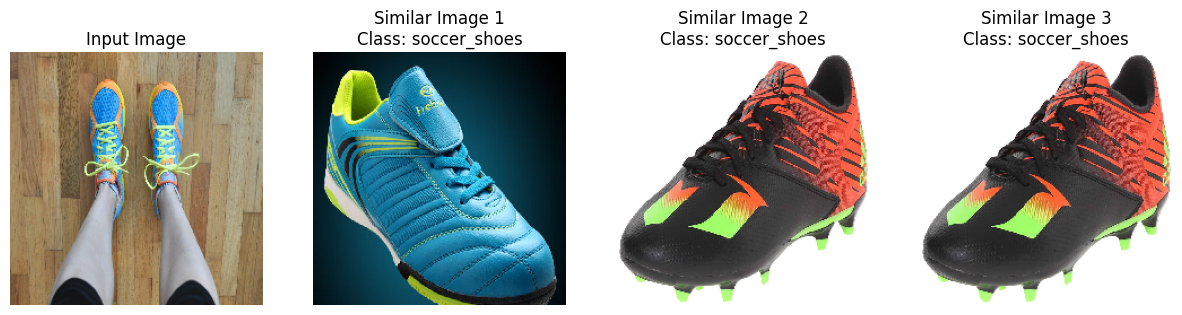

In [8]:
input_img_path = r'test/298ff1c4f46db618a354fdfbe73220c9-scaled.jpg'
similar_images, prediction = find_similar_images(input_img_path, model, features, top_n=50)
print("Prediction:", prediction)
display_similar_images(input_img_path, similar_images)

Image 2

1/1 [==============================] - 0s 43ms/step
Prediction: loafers


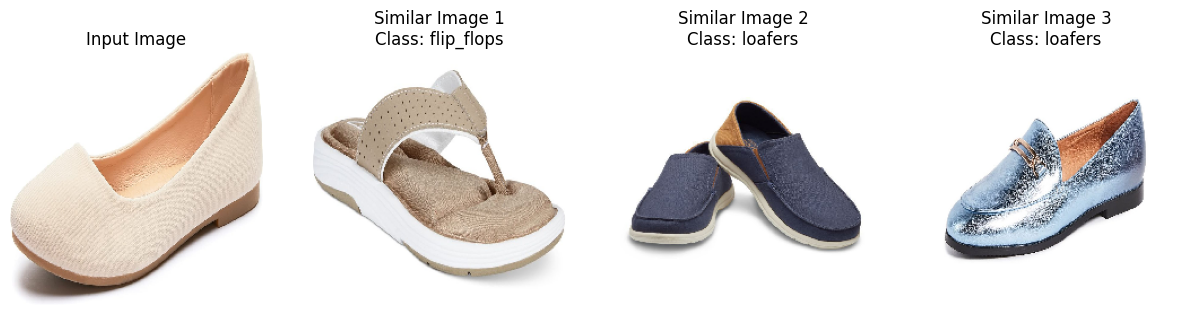

In [9]:
input_img_path = r'test/65398abac7f888664766faf3-obtaom-round-toe-women-flat-shoes-slip.jpg'
similar_images, prediction = find_similar_images(input_img_path, model, features, top_n=10)
print("Prediction:", prediction)
display_similar_images(input_img_path, similar_images)

Image 3

1/1 [==============================] - 0s 29ms/step
Prediction: sandals


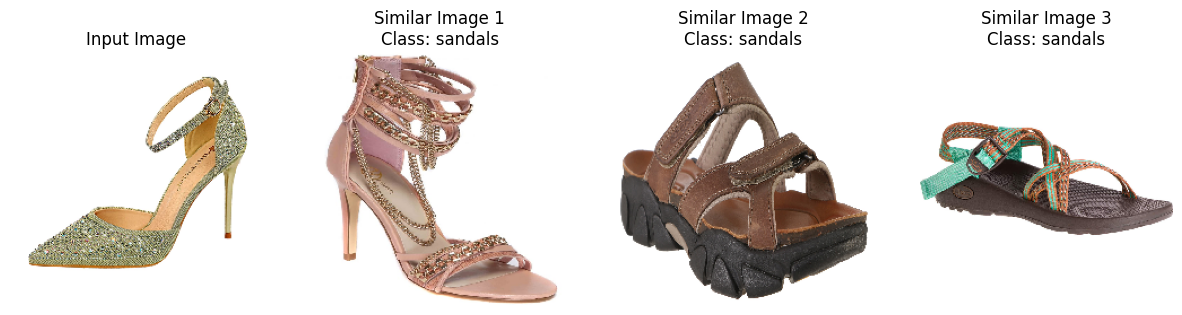

In [10]:
input_img_path = r'test/71KQZEvPHtL.jpg'
similar_images, prediction = find_similar_images(input_img_path, model, features, top_n=10)
print("Prediction:", prediction)
display_similar_images(input_img_path, similar_images)

Image 4

1/1 [==============================] - 0s 31ms/step
Prediction: loafers


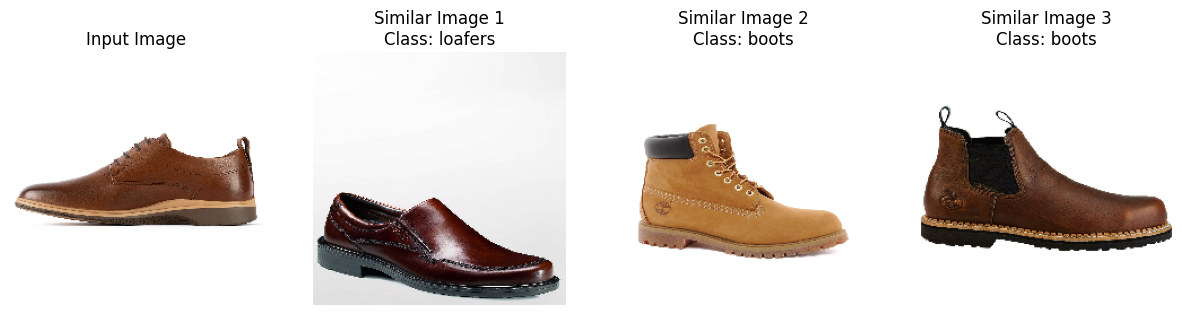

In [11]:
input_img_path = r'test/OGChestnutLeft.jpg'
similar_images, prediction = find_similar_images(input_img_path, model, features, top_n=10)
print("Prediction:", prediction)
display_similar_images(input_img_path, similar_images)

Image 5

1/1 [==============================] - 0s 31ms/step
Prediction: soccer_shoes


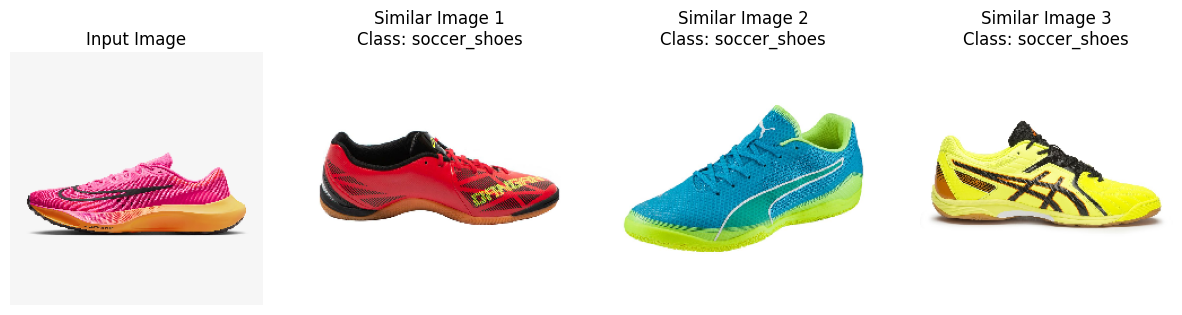

In [12]:
input_img_path = r'test/zoom-fly-5-road-running-shoes-hTNv2r.png'
similar_images, prediction = find_similar_images(input_img_path, model, features, top_n=10)
print("Prediction:", prediction)
display_similar_images(input_img_path, similar_images)